# Technical Analysis

The goal of this project is to investigate popular technical indicator used to forecast trend of underlying ticker. Lets see if they work!

## Load Data

Select a wide variety of data to test whether indicator performance is based on type of underlying. Thus, the underlying we'll investigate on are:

- SSW.JO: Sibanye Stillwater (highly volatile South African stock in the Mining & Energy sector).

- PPE.JO: Purple Group (lowly volatile South African stock in Financial Services sector).

- SPY: The famous S&P500 ETF, representing broad U.S. equity market exposure.

- ^TYX: The US 30-Yr Treasury Yield, a key macroeconomic interest rate indicator.

- EZA: The iShares MSCI South Africa ETF, a proxy for South African equity market.

- USDZAR=X: The USD/ZAR exchange rate, representing currency risk and macroeconomic sentiment.

- BTC-USD: Bitcoin priced in USD, a highly volatile and non-traditional asset class.

NB: The underlying data is sourced from Yahoo Finance. While its not the most reliable or precise data provider, it is sufficient for exploratory analysis and prototyping.

In [1]:
#Import libraries & Yahoo Finance API
import datetime, time
import yfinance as yfin
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import itertools

from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

pd.options.display.float_format = "{:,.6f}".format #Set decimal places

In [2]:
# Starting and end dates
start = datetime.date(2020, 6, 1)
end = datetime.date(2025, 11, 6)

!pip install curl_cffi -U
from curl_cffi import requests
session = requests.Session(impersonate = 'chrome')

# Get SA stock data
df = yfin.download(["SSW.JO", "PPE.JO"], start, end, auto_adjust = False, session = session)["Adj Close"]

# Get US ETF & Treasury Yield data
df_etf = yfin.download(["SPY", "^TYX", "EZA"], start, end, auto_adjust = False, session = session)["Adj Close"]

# Get Weekend data
df_wkd = yfin.download(["USDZAR=X"], start, end, auto_adjust = False, session = session)["Adj Close"]
df_wkd1 = yfin.download(["BTC-USD"], start, end, auto_adjust = False, session = session)["Adj Close"]

Failed to get ticker 'SSW.JO' reason: 'str' object has no attribute 'name'
Failed to get ticker 'PPE.JO' reason: 'str' object has no attribute 'name'
[*********************100%%**********************]  1 of 2 completed

2 Failed downloads:
['SSW.JO', 'PPE.JO']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
Failed to get ticker 'SPY' reason: 'str' object has no attribute 'name'
[                       0%%                      ]Failed to get ticker 'EZA' reason: 'str' object has no attribute 'name'
Failed to get ticker '^TYX' reason: 'str' object has no attribute 'name'
[*********************100%%**********************]  3 of 3 completed

3 Failed downloads:
['SPY', 'EZA', '^TYX']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
Failed to get ticker 'USDZAR=X' reason: 'str' object has no attribute 'name'
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['USDZAR=X']: YFTzMissingError('$%ticker%: possibly del

In [311]:
#Get High Prices
# Get SA stock data
df_h = yfin.download(["SSW.JO", "PPE.JO"], start, end, auto_adjust = False, session = session)["High"]

# Get US ETF & Treasury Yield data
df_etf_h = yfin.download(["SPY", "^TYX", "EZA"], start, end, auto_adjust = False, session = session)["High"]

# Get Weekend data
df_wkd_h = yfin.download(["USDZAR=X"], start, end, auto_adjust = False, session = session)["High"]
df_wkd1_h = yfin.download(["BTC-USD"], start, end, auto_adjust = False, session = session)["High"]

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [312]:
#Get Low Prices
# Get SA stock data
df_l = yfin.download(["SSW.JO", "PPE.JO"], start, end, auto_adjust = False, session = session)["Low"]

# Get US ETF & Treasury Yield data
df_etf_l = yfin.download(["SPY", "^TYX", "EZA"], start, end, auto_adjust = False, session = session)["Low"]

# Get Weekend data
df_wkd_l = yfin.download(["USDZAR=X"], start, end, auto_adjust = False, session = session)["Low"]
df_wkd1_l = yfin.download(["BTC-USD"], start, end, auto_adjust = False, session = session)["Low"]

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


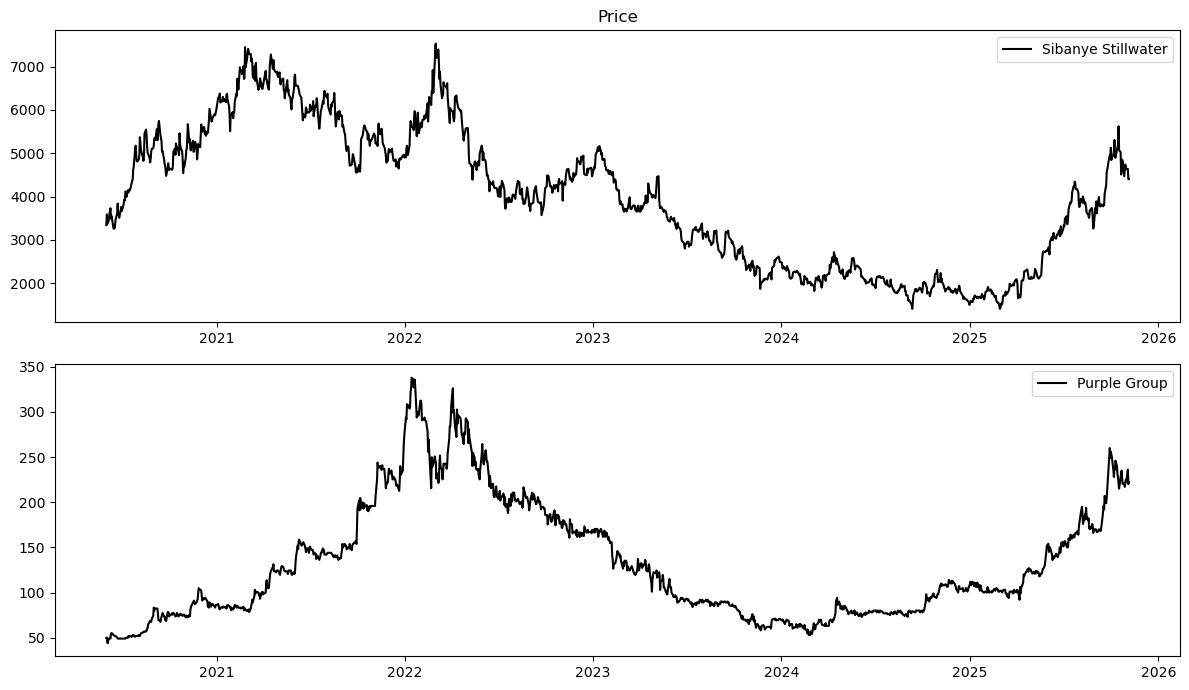

In [313]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7))

# Price Plot
axes[0].plot(df["SSW.JO"].index, df["SSW.JO"], label='Sibanye Stillwater', color='black')
axes[0].set_title('Price')
axes[0].legend()

axes[1].plot(df["PPE.JO"].index, df["PPE.JO"], label='Purple Group', color='black')
axes[1].legend()

plt.tight_layout()
plt.show()

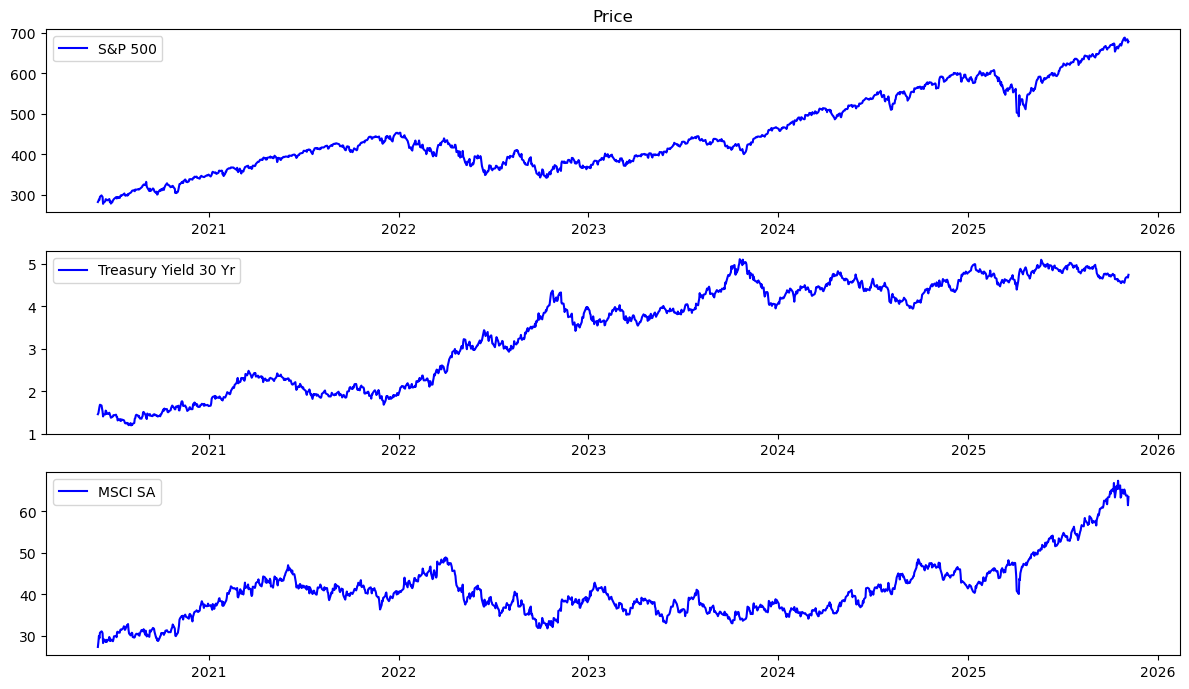

In [314]:
fig, axes = plt.subplots(3, 1, figsize=(12, 7))

axes[0].plot(df_etf["SPY"].index, df_etf["SPY"], label='S&P 500', color='blue')
axes[0].set_title('Price')
axes[0].legend()

axes[1].plot(df_etf["^TYX"].index, df_etf["^TYX"], label='Treasury Yield 30 Yr', color='blue')
axes[1].legend()

axes[2].plot(df_etf["EZA"].index, df_etf["EZA"], label='MSCI SA', color='blue')
axes[2].legend()

plt.tight_layout()
plt.show()

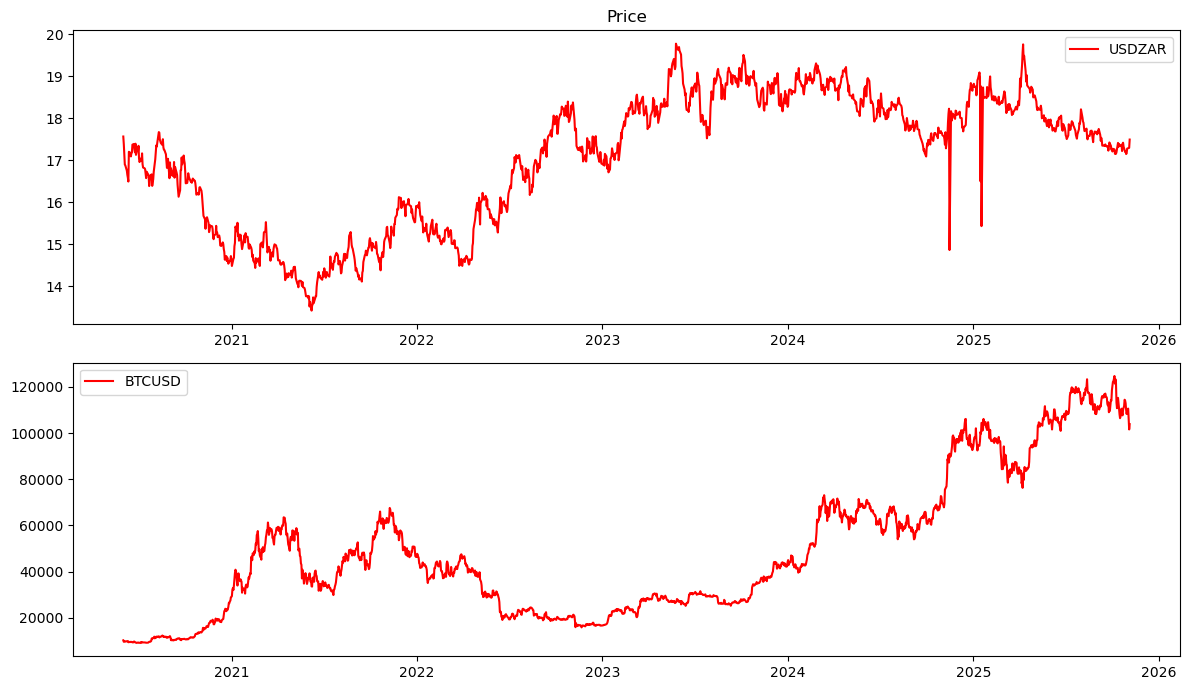

In [315]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7))

# Price Plot
axes[0].plot(df_wkd["USDZAR=X"].index, df_wkd["USDZAR=X"], label='USDZAR', color='red')
axes[0].set_title('Price')
axes[0].legend()

axes[1].plot(df_wkd1["BTC-USD"].index, df_wkd1["BTC-USD"], label='BTCUSD', color='red')
axes[1].legend()

plt.tight_layout()
plt.show()

# Relative Strength Indicator

In [316]:
##RSI Calculation
def calculate_rsi(prices, period=14):
    delta = prices.diff() # Calculate price changes
    
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    gain_series = pd.Series(gain, index=prices.index)
    loss_series = pd.Series(loss, index=prices.index)

    #Smoothed averages (reacts better to changing market momentum)
    avg_gain = gain_series.ewm(alpha=1/period, min_periods=period).mean()
    avg_loss = loss_series.ewm(alpha=1/period, min_periods=period).mean()

    rs = avg_gain / avg_loss # Relative Strength
    
    rsi = 100 - (100 / (1 + rs)) # RSI formula
    return rsi

In [317]:
##Trend Filter 
def trnd_fltr(dat, MA_lwr, MA_upp):
    dat['MA_lwr'] = dat['Price'].rolling(MA_lwr).mean() #Shorter window
    dat['MA_upp'] = dat['Price'].rolling(MA_upp).mean() #Longer window

    # Trend Identifier
    dat['Trend'] = np.where(dat['MA_lwr'] > dat['MA_upp'], 'Uptrend', 'Downtrend')

    return dat

In [318]:
#Assign values
def rez_id(bps_change):
    #Initiate
    bps_sucs = 0
    bps_gnd = 0
    bps_fail = 0
    bps_lst = 0

    #Conditions
    if bps_change > 0:
        bps_sucs = 1
        bps_gnd = bps_change
    else:
        bps_fail = 1
        bps_lst = abs(bps_change)

    return bps_sucs, bps_fail, bps_gnd, bps_lst

In [319]:
def metr_rsi_v3(data, start_date, end_date, lookahead=3, period=14, 
                         MA_lwr=50, MA_upp=200, rsi_bnch=(70, 30), plot=True):
    # Datetime index and proper slicing
    data = data.copy()
    data.index = pd.to_datetime(data.index)
    data = data.loc[start_date:end_date].sort_index()

    # Calculate RSI
    rsi = calculate_rsi(data, period=period)
    
    # Build working DataFrame
    data = pd.DataFrame({"Price": data, "RSI": rsi})

    # Identify crossovers
    data['RSI_prev'] = data['RSI'].shift(1)
    data['RSI_Cross'] = np.select([
        (data['RSI_prev'] < rsi_bnch[1]) & (data['RSI'] >= rsi_bnch[1]),
        (data['RSI_prev'] > rsi_bnch[0]) & (data['RSI'] <= rsi_bnch[0])
    ], ['Buy_Cross', 'Sell_Cross'], default='None')

    # Base signals (threshold logic)
    data['Signal'] = np.select(
        [data['RSI'] > rsi_bnch[0],
         data['RSI'] < rsi_bnch[1]],
        ['Sell', 'Buy'],
        default='Hold'
    )

    # Trend filter
    data = trnd_fltr(data, MA_lwr, MA_upp)

    #Position
    data['Position'] = data['Signal'].replace('Hold', pd.NA).ffill()
    data['Position'] = data['Position'].replace(pd.NA, 'Hold')
    
    # Performance testing
    results = []
    for i in range(len(data) - lookahead):
        current_price = data['Price'].iloc[i]
        future_price = data['Price'].iloc[i + lookahead]

        signal = data['Position'].iloc[i]
        trend = data['Trend'].iloc[i]

        if signal == 'Buy':
            bps_chng = ((future_price - current_price) / current_price) * 10000
        elif signal == 'Sell':
            bps_chng = ((current_price - future_price) / current_price) * 10000
        else:
            bps_chng = ((future_price - current_price) / current_price) * 10000

        bps_sucs, bps_fail, bps_gnd, bps_lst = rez_id(bps_chng)

        results.append({
            'Date': data.index[i],
            'Position': signal,
            'Trend': trend,
            'bps_change': bps_chng,
            '#Trades_Gain': bps_sucs,
            '#Trades_Lost': bps_fail,
            'bps_gained': bps_gnd,
            'bps_lost': bps_lst,
            'RSI': data['RSI'].iloc[i],
            'RSI_Cross': data['RSI_Cross'].iloc[i]
        })

    results_df = pd.DataFrame(results).set_index('Date')

    # Performance Summary
    summary = results_df.groupby(['Position', 'Trend'])['bps_change'].agg(['count', 'mean', 'median', 'std'])
    win_rate = results_df.groupby(['Position', 'Trend']).apply(lambda x: (x['bps_change'] > 0).mean() * 100).rename('Win_Rate(%)')
    
    summary = summary.join(win_rate)
    summary['Sharpe'] = summary['mean'] / summary['std']
    
    # Compute win/loss ratio and expected value
    gain_stats = results_df[results_df['bps_change'] > 0]['bps_change'].mean()
    loss_stats = abs(results_df[results_df['bps_change'] < 0]['bps_change'].mean())
    overall_wr = (results_df['bps_change'] > 0).mean() * 100

    summary['Win/Loss_Ratio'] = gain_stats / loss_stats if loss_stats != 0 else np.nan
    summary['Expected_Value'] = (overall_wr/100 * gain_stats) - ((1 - overall_wr/100) * loss_stats)

    # Visualization 
    if plot:
        fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

        # Price Plot
        axes[0].plot(data.index, data['Price'], label='Price', color='black')
        axes[0].plot(data['MA_lwr'], label=f'MA{MA_lwr}', linestyle='--', alpha=0.6)
        axes[0].plot(data['MA_upp'], label=f'MA{MA_upp}', linestyle='--', alpha=0.6)

        buy_points = data[data['Signal'] == 'Buy'].index
        sell_points = data[data['Signal'] == 'Sell'].index

        axes[0].scatter(buy_points, data.loc[buy_points, 'Price'], color='green', marker='^', label='Buy Signal')
        axes[0].scatter(sell_points, data.loc[sell_points, 'Price'], color='red', marker='v', label='Sell Signal')
        axes[0].set_title('Price and Signals')
        axes[0].legend()

        # RSI Plot
        axes[1].plot(data.index, data['RSI'], label='RSI', color='blue')
        axes[1].axhline(rsi_bnch[0], color='red', linestyle='--', label=f'Overbought {rsi_bnch[0]}')
        axes[1].axhline(rsi_bnch[1], color='green', linestyle='--', label=f'Oversold {rsi_bnch[1]}')
        axes[1].set_title('RSI Levels')
        axes[1].legend()

        plt.tight_layout()
        plt.show()

    return summary, results_df

2020-06-01 00:00:00
2025-11-05 00:00:00


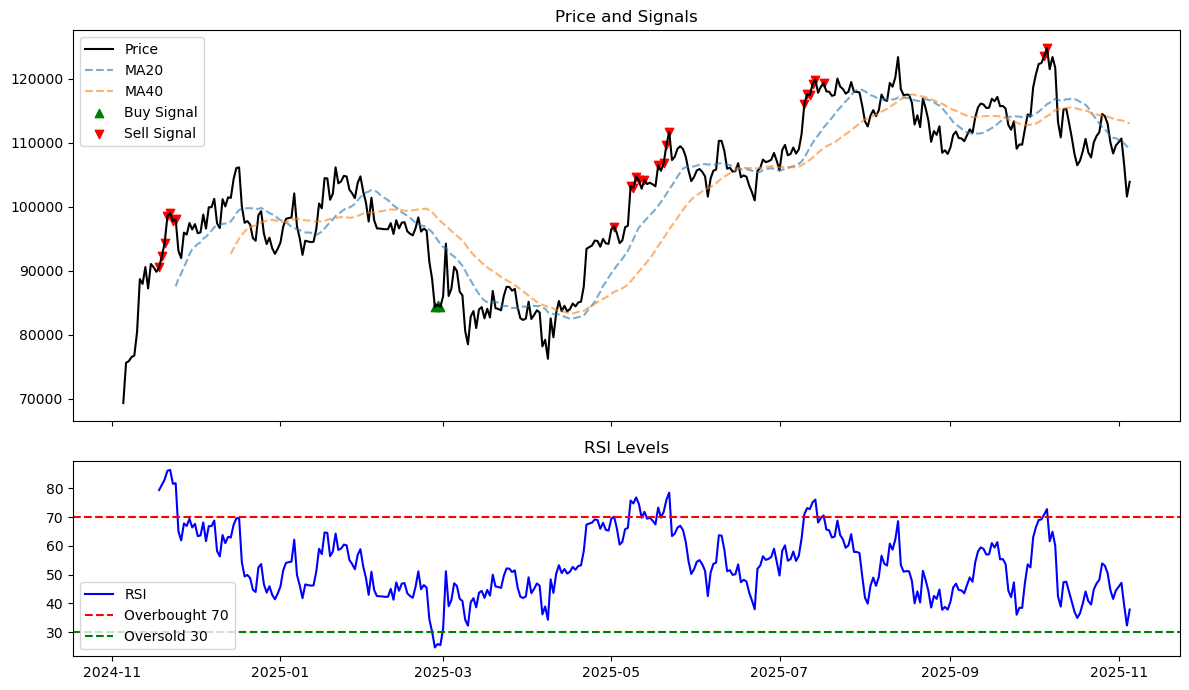

(                    count         mean       median        std  Win_Rate(%)  \
 Position Trend                                                                
 Buy      Downtrend     57   122.945984    90.205627 601.844887    61.403509   
          Uptrend        8   241.985273   249.095634 217.288630    87.500000   
 Hold     Downtrend     13 1,230.467192 1,164.555288 716.928750   100.000000   
 Sell     Downtrend    118   -19.428648   -57.594310 470.301867    44.067797   
          Uptrend      163    -5.778504    21.711582 483.284571    50.920245   
 
                       Sharpe  Win/Loss_Ratio  Expected_Value  
 Position Trend                                                
 Buy      Downtrend  0.204282        1.191006       60.460725  
          Uptrend    1.113658        1.191006       60.460725  
 Hold     Downtrend  1.716303        1.191006       60.460725  
 Sell     Downtrend -0.041311        1.191006       60.460725  
          Uptrend   -0.011957        1.191006       60

In [320]:
#Function inputs:
    #Data - stock (adjusted) closing price
    #Start Date - The first date of analysis
    #End Date - The last date of analysis
    #NB: Analysis options include either duration measure (i.e. 1-,3-,6-month periods) or independently adjust start & end dates
    #Period - The duration of RSI measurement
    #Lookahead - Holding period, i.e. how many days you hold a stock before a 'new' position is taken
    #MA_lwr - Lower MA window in trend filter
    #MA_upp - Upper MA window in trend filter
    #rsi_upp - Upper bound for RSI 
    #rsi_lwr - Lower bound for RSI 

#Function outputs:
    #Summary - Computes metrics of bps change grouped by Signal & Trend
    #Results - Dataframe with results for each trading day position
    #Data - Output of RSI and Trend Filter trading strategy from price data

#An example: 2020, 6, 1)
print(df.index[-1] - pd.DateOffset(years=5, months=5, days=4))
print(df.index[-1])

metr_rsi_v3(data=df_wkd1["BTC-USD"] , start_date=df.index[-1] - pd.DateOffset(years=1), 
                                  end_date=df.index[-1], lookahead=7, MA_lwr=20, MA_upp=40, period=14, rsi_bnch=(70,30), plot=True)

In [321]:
# Start timer
start_time = time.time()

# Define dats
dats = [df["SSW.JO"], df["PPE.JO"], df_etf["SPY"], df_etf["^TYX"], df_etf["EZA"], df_wkd["USDZAR=X"], df_wkd1["BTC-USD"]]

# Define date ranges
starts = [
    df.index[-1] - pd.DateOffset(years=0, months=6),
    df.index[-1] - pd.DateOffset(years=0, months=3),
    df.index[-1] - pd.DateOffset(years=0, months=1),
    df.index[-1] - pd.DateOffset(years=0, months=0, days=14),
    df.index[-1] - pd.DateOffset(years=0, months=0, days=7)
]

ends = [
    df.index[-1]
]

# Other hyperparameters
lookaheads = [1, 2, 4, 7]
MA_lwrs = [1, 5, 7]
MA_upps = [7, 10, 14]
periods = [4, 7, 14]
rsi_bnchs = [(70, 30), (80, 20), (60, 40)]

# Define parameter grid
param_grid = list(itertools.product(
    dats, starts, ends, lookaheads, MA_lwrs, MA_upps, periods, rsi_bnchs
))

results = []
best_score = float('-inf')
less_score = float('inf')
best_params = None
less_params = None

def evaluate_params(params):
    dat, start, end, lookahead, MA_lwr, MA_upp, period, rsi_bnch = params

    if end <= start or MA_upp <= MA_lwr or (end.date() - start.date()).days <= MA_upp or lookahead >= MA_upp:
        return None

    try:
        f_summ, f_rez = metr_rsi_v3(data=dat, start_date=start, end_date=end, lookahead=lookahead,
            MA_lwr=MA_lwr, MA_upp=MA_upp, period=period, rsi_bnch=rsi_bnch, plot=False)
        score = f_summ['Expected_Value'].mean()

        return {
            'Data': dat.name,
            'Start': start,
            'End': end,
            'Lookahead': lookahead,
            'MA_lwr': MA_lwr,
            'MA_upp': MA_upp,
            'Period': period,
            'RSI_Benchmark': rsi_bnch,
            'Score': score
        }

    except Exception as e:
        print(f"Error for {dat.name}, {start}, {end}, {lookahead}, {MA_lwr}, {MA_upp}, {period}, {rsi_bnch}: {e}")
        return None

# Run grid search with progress bar and parallel execution
with ThreadPoolExecutor() as executor:
    for result in tqdm(executor.map(evaluate_params, param_grid), total=len(param_grid)):
        if result:
            results.append(result)
            score = result['Score']
            if score > best_score:
                best_score = score
                best_params = result
            if score < less_score:
                less_score = score
                less_params = result

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Output best and worst results
if best_params:
    print("\nBest combination found:")
    print(best_params)
    print(f"Avg BPS Gained: {best_score:.2f}")

if less_params:
    print("\nWorst combination found:")
    print(less_params)
    print(f"Avg BPS Lost: {less_score:.2f}")

# Total runtime
end_time = time.time()
print(f"\nTotal Run Time: {(end_time - start_time)/60:.2f} minutes")

100%|██████████| 11340/11340 [03:56<00:00, 47.86it/s] 


Best combination found:
{'Data': 'PPE.JO', 'Start': Timestamp('2025-08-05 00:00:00'), 'End': Timestamp('2025-11-05 00:00:00'), 'Lookahead': 7, 'MA_lwr': 1, 'MA_upp': 10, 'Period': 14, 'RSI_Benchmark': (80, 20), 'Score': 495.56417771937186}
Avg BPS Gained: 495.56

Worst combination found:
{'Data': 'SSW.JO', 'Start': Timestamp('2025-10-05 00:00:00'), 'End': Timestamp('2025-11-05 00:00:00'), 'Lookahead': 7, 'MA_lwr': 1, 'MA_upp': 10, 'Period': 14, 'RSI_Benchmark': (70, 30), 'Score': -381.5711703112558}
Avg BPS Lost: -381.57

Total Run Time: 3.98 minutes


In [322]:
# Print top results
print(results_df.sort_values(by='Score', ascending=False).dropna())

        Data      Start        End  Lookahead  MA_lwr  MA_upp  Period  \
1501  PPE.JO 2025-08-05 2025-11-05          7       7      10      14   
1510  PPE.JO 2025-08-05 2025-11-05          7       7      14      14   
1492  PPE.JO 2025-08-05 2025-11-05          7       5      14      14   
1483  PPE.JO 2025-08-05 2025-11-05          7       5      10      14   
1474  PPE.JO 2025-08-05 2025-11-05          7       1      14      14   
...      ...        ...        ...        ...     ...     ...     ...   
799   SSW.JO 2025-10-05 2025-11-05          7       7      10      14   
807   SSW.JO 2025-10-05 2025-11-05          7       7      14      14   
808   SSW.JO 2025-10-05 2025-11-05          7       7      14      14   
809   SSW.JO 2025-10-05 2025-11-05          7       7      14      14   
800   SSW.JO 2025-10-05 2025-11-05          7       7      10      14   

     RSI_Benchmark       Score  
1501      (80, 20)  495.564178  
1510      (80, 20)  495.564178  
1492      (80, 20)  495.

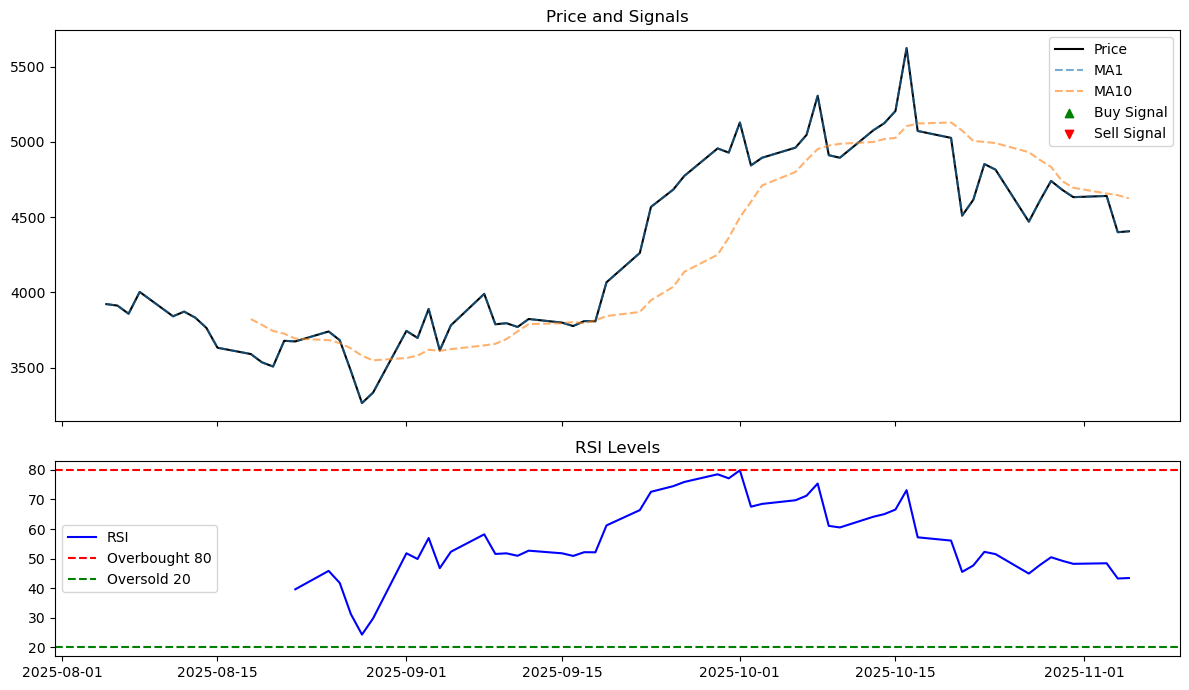

(                    count       mean      median          std  Win_Rate(%)  \
 Position Trend                                                               
 Hold     Downtrend     28  34.475654 -357.416701 1,068.089446    39.285714   
          Uptrend       31 444.058533  469.867211 1,061.684487    64.516129   
 
                      Sharpe  Win/Loss_Ratio  Expected_Value  
 Position Trend                                               
 Hold     Downtrend 0.032278        1.729140      249.680217  
          Uptrend   0.418258        1.729140      249.680217  ,
            Position      Trend    bps_change  #Trades_Gain  #Trades_Lost  \
 Date                                                                       
 2025-08-05     Hold  Downtrend   -402.855686             0             1   
 2025-08-06     Hold  Downtrend   -715.746421             0             1   
 2025-08-07     Hold  Downtrend   -694.660446             0             1   
 2025-08-08     Hold  Downtrend -1,169.12315

In [323]:
##Best combination
metr_rsi_v3(data=df["SSW.JO"], start_date=best_params['Start'], end_date=best_params['End'], lookahead=best_params['Lookahead'],
                                   MA_lwr=best_params['MA_lwr'], MA_upp=best_params['MA_upp'], period=best_params['Period'], 
            rsi_bnch=best_params['RSI_Benchmark'], plot=True)

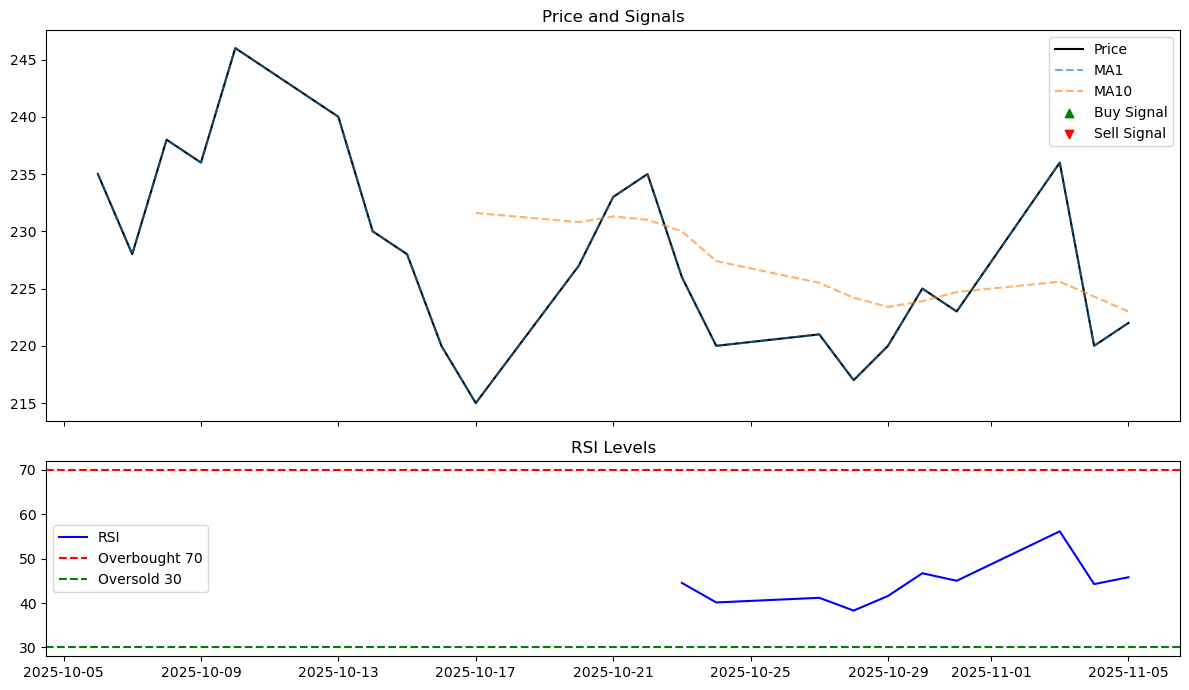

(                    count        mean      median        std  Win_Rate(%)  \
 Position Trend                                                              
 Hold     Downtrend     14 -210.016884 -253.102837 334.359635    28.571429   
          Uptrend        2 -426.992969 -426.992969 118.292359     0.000000   
 
                       Sharpe  Win/Loss_Ratio  Expected_Value  
 Position Trend                                                
 Hold     Downtrend -0.628117        0.389569     -262.254956  
          Uptrend   -3.609641        0.389569     -262.254956  ,
            Position      Trend  bps_change  #Trades_Gain  #Trades_Lost  \
 Date                                                                     
 2025-10-06     Hold  Downtrend -297.872340             0             1   
 2025-10-07     Hold  Downtrend -350.877193             0             1   
 2025-10-08     Hold  Downtrend -966.386555             0             1   
 2025-10-09     Hold  Downtrend -381.355932           

In [324]:
##Worst combination  
metr_rsi_v3(data=df["PPE.JO"], start_date=less_params['Start'], end_date=less_params['End'], lookahead=less_params['Lookahead'],
                                   MA_lwr=less_params['MA_lwr'], MA_upp=less_params['MA_upp'], period=less_params['Period'], 
            rsi_bnch=less_params['RSI_Benchmark'], plot=True)

In [325]:
#Analysis
results_df1 = results_df

# Clean the Score column
results_df1['Score'] = results_df1['Score'].astype(str).str.replace(',', '').astype(float)

# Descriptive statistics
print("Descriptive Statistics for 'Score':")
print(results_df1['Score'].describe())

# Group-wise average scores by Data
group_summary = results_df1.groupby(['Data'])['Score'].mean().reset_index()

print("\n Parameter Combinations by Data:")
print(group_summary.sort_values(by='Score', ascending=False))

# By Lookahead
group_summary = results_df1.groupby(['Lookahead'])['Score'].mean().reset_index()

print("\n Parameter Combinations by Lookahead:")
print(group_summary.sort_values(by='Score', ascending=False))

# By Moving Averages
group_summary = results_df1.groupby(['MA_lwr', 'MA_upp'])['Score'].mean().reset_index()

print("\nTop Parameter Combinations by MA:")
print(group_summary.sort_values(by='Score', ascending=False))

# By Period
group_summary = results_df1.groupby(['Period'])['Score'].mean().reset_index()

print("\nTop Parameter Combinations by Period:")
print(group_summary.sort_values(by='Score', ascending=False))

# By RSI Benchmark
group_summary = results_df1.groupby(['RSI_Benchmark'])['Score'].mean().reset_index()

print("\nTop Parameter Combinations by RSI Benchmark:")
print(group_summary.sort_values(by='Score', ascending=False))

Descriptive Statistics for 'Score':
count   6,750.000000
mean      -12.881760
std        96.304954
min      -381.571170
25%       -43.287465
50%        -1.832774
75%        21.202765
max       495.564178
Name: Score, dtype: float64

 Parameter Combinations by Data:
       Data      Score
3       SPY  17.819738
6      ^TYX   6.467798
5  USDZAR=X   3.506434
0   BTC-USD  -1.686668
1       EZA -23.828619
4    SSW.JO -25.493976
2    PPE.JO -65.706864

 Parameter Combinations by Lookahead:
   Lookahead      Score
0          1   1.139658
1          2  -5.338645
2          4 -18.226441
3          7 -35.817870

Top Parameter Combinations by MA:
   MA_lwr  MA_upp      Score
0       1       7  -8.328764
3       5       7  -8.328764
2       1      14 -10.421501
5       5      14 -10.421501
7       7      14 -10.421501
1       1      10 -17.043181
4       5      10 -17.043181
6       7      10 -17.043181

Top Parameter Combinations by Period:
   Period      Score
0       4   1.427161
1       7 -13.

## Conclusion

From the above analysis, we observe that RSI works best on Sibanye Stillwater, within the period of 17 Oct 2024 to 17 July 2025. It had parameters: 

- Lookahead = 20: The underlying trading positions (i.e. buy, hold or sell) were changed after 20 business days, if need be.
- MA_lwr = 30: In determining underlying trend filter, the shorter window is 30 days
- MA_upp = 50: Upper window is 50 days.
- Period = 14: In calculation of underlying RSI metric, the most previous 14 closing prices were used to compute momentum.
- RSI_Benchmark = (80, 20): The RSI thresholds used where 80-20% for overbought and oversold regions.
- Score = 1117.62: This is the total basis point trade profit gained from following strategy.

The RSI seemed to not have effectively generated profit for the trader as the visual indicates that the trade gains were not due to RSI triggers.

Whilst the worst performing trading strategy indicated that RSI constantly indicated to take a bear position during an upward trending in Sibanye Stillwater share price.

# MA Cross

In [326]:
def moving_average_crossover(prices, short_window=50, long_window=200):
    if short_window <= 0 or long_window <= 0:
        raise ValueError("Moving average windows must be positive integers.")
    if short_window >= long_window:
        raise ValueError("short_window must be less than long_window.")

    # Calculate moving averages
    prices["Short_MA"] = prices["Price"].rolling(window=short_window, min_periods=1).mean()
    prices["Long_MA"] = prices["Price"].rolling(window=long_window, min_periods=1).mean()

    # Generate signals: 1 = Buy (Golden Cross), -1 = Sell (Death Cross), 0 = Hold
    prices["Signal"] = 'Hold'
    prices.loc[prices["Short_MA"] > prices["Long_MA"], "Signal"] = 'Buy'
    prices.loc[prices["Short_MA"] < prices["Long_MA"], "Signal"] = 'Sell'
    
    # Detect crossover points (change in signal)
    prices["Crossover"] = prices["Signal"] != prices["Signal"].shift(1)
    prices.iloc[0, prices.columns.get_loc("Crossover")] = False

    return prices

In [327]:
def metr_ma_crx_v1(data, start_date, end_date, ma_upp, ma_lwr, lookahead, plot=True):
    data = data.copy()
    data.index = pd.to_datetime(data.index)

    #Slice Data
    data = data.loc[start_date:end_date].sort_index()
    
    data.rename(columns={data.columns[0]: "Price"}, inplace=True)
    
    #Apply technical
    ma_X = moving_average_crossover(prices=data, short_window=ma_lwr, long_window=ma_upp)

    #Actual Daily Price Trend
    ma_X['Price Trend'] = np.where(ma_X['Price'].diff()>0, 'Uptrend', 'Downtrend')

    # Performance testing
    results = []
    for i in range(len(ma_X) - lookahead):
        current_price = ma_X['Price'].iloc[i]
        future_price = ma_X['Price'].iloc[i + lookahead]
        
        signal = ma_X['Signal'].iloc[i]
        trend = ma_X['Price Trend'].iloc[i+1] 
        
        if signal == 'Buy':
            bps_chng = ((future_price - current_price) / current_price) * 10000
        elif signal == 'Sell':
            bps_chng = ((current_price - future_price) / current_price) * 10000
        else:
            # Follow the prevailing trend
            if trend == 'Uptrend':
                bps_chng = ((future_price - current_price) / current_price) * 10000
            else:
                bps_chng = ((current_price - future_price) / current_price) * 10000
                
        bps_sucs, bps_fail, bps_gnd, bps_lst = rez_id(bps_chng)
        
        results.append({
            'Date': ma_X.index[i],
            'Signal': signal,
            'Trend': trend,
            'bps_change': bps_chng,
            '#Trades_Gain': bps_sucs,
            '#Trades_Lost': bps_fail,
            'bps_gained': bps_gnd,
            'bps_lost': bps_lst
        })
    
    results_df = pd.DataFrame(results).set_index('Date')

    # Performance Summary
    summary = results_df.groupby(['Signal', 'Trend'])['bps_change'].agg(['count', 'mean', 'median', 'std'])
    win_rate = results_df.groupby(['Signal', 'Trend']).apply(lambda x: (x['bps_change'] > 0).mean() * 100).rename('Win_Rate(%)')
    
    summary = summary.join(win_rate)
    summary['Sharpe'] = summary['mean'] / summary['std']
    
    # Compute win/loss ratio and expected value
    gain_stats = results_df[results_df['bps_change'] > 0]['bps_change'].mean()
    loss_stats = abs(results_df[results_df['bps_change'] < 0]['bps_change'].mean())
    overall_wr = (results_df['bps_change'] > 0).mean() * 100

    summary['Win/Loss_Ratio'] = gain_stats / loss_stats if loss_stats != 0 else np.nan
    summary['Expected_Value'] = (overall_wr/100 * gain_stats) - ((1 - overall_wr/100) * loss_stats)
    
    # Visualization 
    if plot:
        fig, axes = plt.subplots(1, 1, figsize=(12, 4), sharex=True)

        # Price Plot
        axes.plot(ma_X.index, ma_X['Price'], label='Price', color='black')
        axes.plot(ma_X['Short_MA'], label=f'Short MA - {ma_lwr}', linestyle='--', alpha=0.6)
        axes.plot(ma_X['Long_MA'], label=f'Long MA - {ma_upp}', linestyle='--', alpha=0.6)

        gcrss_pnt = ma_X[(ma_X['Crossover'] == True) & (ma_X['Signal'] == 'Buy')].index
        dcrss_pnt = ma_X[(ma_X['Crossover'] == True) & (ma_X['Signal'] == 'Sell')].index

        axes.scatter(gcrss_pnt, ma_X.loc[gcrss_pnt, 'Price'], facecolors='none', edgecolors='green', marker='o', label='Golden Cross')
        axes.scatter(dcrss_pnt, ma_X.loc[dcrss_pnt, 'Price'], facecolors='none', edgecolors='red', marker='o', label='Death Cross')
        axes.set_title('Price and Signals')
        axes.legend()

        plt.tight_layout()
        plt.show()
    return summary, results_df

2020-06-01 00:00:00
2025-11-05 00:00:00


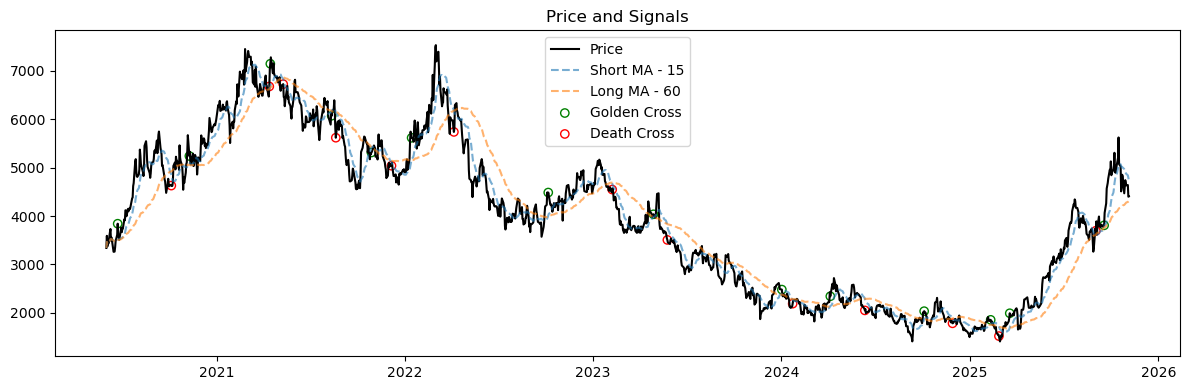

(                  count        mean      median        std  Win_Rate(%)  \
Signal Trend                                                              
Buy    Downtrend    325 -190.631651 -206.527282 575.415395    34.461538   
       Uptrend      313  298.372892  260.638298 692.337566    66.134185   
Hold   Downtrend      5  336.668636   56.818099 593.254387    80.000000   
       Uptrend       10  405.164764  317.641321 767.303362    70.000000   
Sell   Downtrend    371  212.613900  207.423581 601.414150    67.654987   
       Uptrend      332 -260.220564 -181.777831 661.509801    34.939759   

                    Sharpe  Win/Loss_Ratio  Expected_Value  
Signal Trend                                                
Buy    Downtrend -0.331294        1.025681       21.115429  
       Uptrend    0.430964        1.025681       21.115429  
Hold   Downtrend  0.567495        1.025681       21.115429  
       Uptrend    0.528037        1.025681       21.115429  
Sell   Downtrend  0.353523      

In [328]:
print(df.index[-1] - pd.DateOffset(years=5, months=5, days=4))
print(df.index[-1])

print(metr_ma_crx_v1(data=df[["SSW.JO"]], start_date=df.index[-1] - pd.DateOffset(years=5, months=5, days=4), end_date=df.index[-1],
     ma_upp=60, ma_lwr=15, lookahead=4, plot=True))

In [331]:
# Start timer
start_time = time.time()

# Define dats
dats = [df[["SSW.JO"]], df[["PPE.JO"]], df_etf[["SPY"]], df_etf[["^TYX"]], df_etf[["EZA"]], df_wkd[["USDZAR=X"]], df_wkd1[["BTC-USD"]]]

# Define date ranges
starts = [
    df.index[-1] - pd.DateOffset(years=1, months=0),
    df.index[-1] - pd.DateOffset(years=0, months=6),
    df.index[-1] - pd.DateOffset(years=0, months=3),
    df.index[-1] - pd.DateOffset(years=0, months=1),
    df.index[-1] - pd.DateOffset(years=0, months=0, days=14),
    df.index[-1] - pd.DateOffset(years=0, months=0, days=7)
]

ends = [
    df.index[-1]
]

# Other hyperparameters
lookaheads = [1, 2, 4, 7]
MA_lwrs = [1, 5, 7]
MA_upps = [7, 10, 14]

# Define parameter grid
param_grid = list(itertools.product(
    dats, starts, ends, lookaheads, MA_lwrs, MA_upps
))

results = []
best_score = float('-inf')
less_score = float('inf')
best_params = None
less_params = None

def evaluate_params(params):
    dat, start, end, lookahead, MA_lwr, MA_upp = params

    if end <= start or MA_upp <= MA_lwr or (end.date() - start.date()).days <= MA_upp or lookahead >= MA_upp:
        return None

    try:
        f_summ, f_rez = metr_ma_crx_v1(data=dat, start_date=start, end_date=end, ma_upp=MA_upp, ma_lwr=MA_lwr,
                                       lookahead=lookahead, plot=False)
        
        score = f_summ['Expected_Value'].mean()

        return {
            'Data': dat.columns[0],
            'Start': start,
            'End': end,
            'Lookahead': lookahead,
            'MA_lwr': MA_lwr,
            'MA_upp': MA_upp,
            'Score': score
        }

    except Exception as e:
        print(f"Error for {dat.columns[0]}, {start}, {end}, {lookahead}, {MA_lwr}, {MA_upp}: {e}")
        return None

# Run grid search with progress bar and parallel execution
with ThreadPoolExecutor() as executor:
    for result in tqdm(executor.map(evaluate_params, param_grid), total=len(param_grid)):
        if result:
            results.append(result)
            score = result['Score']
            if score > best_score:
                best_score = score
                best_params = result
            if score < less_score:
                less_score = score
                less_params = result

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Output best and worst results
if best_params:
    print("\nBest combination found:")
    print(best_params)
    print(f"Avg BPS Gained: {best_score:.2f}")

if less_params:
    print("\nWorst combination found:")
    print(less_params)
    print(f"Avg BPS Lost: {less_score:.2f}")

# Total runtime
end_time = time.time()
print(f"\nTotal Run Time: {(end_time - start_time)/60:.2f} minutes")

100%|██████████| 1512/1512 [00:32<00:00, 46.41it/s]


Best combination found:
{'Data': 'SSW.JO', 'Start': Timestamp('2025-10-22 00:00:00'), 'End': Timestamp('2025-11-05 00:00:00'), 'Lookahead': 2, 'MA_lwr': 5, 'MA_upp': 10, 'Score': 364.8850609204279}
Avg BPS Gained: 364.89

Worst combination found:
{'Data': 'PPE.JO', 'Start': Timestamp('2025-10-05 00:00:00'), 'End': Timestamp('2025-11-05 00:00:00'), 'Lookahead': 4, 'MA_lwr': 1, 'MA_upp': 7, 'Score': -400.1810740450226}
Avg BPS Lost: -400.18

Total Run Time: 0.56 minutes


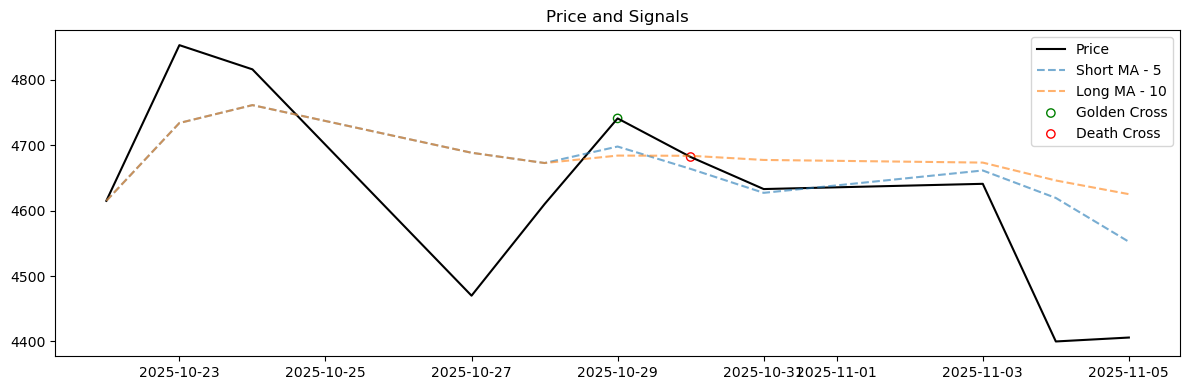

(                  count        mean      median        std  Win_Rate(%)  \
 Signal Trend                                                              
 Buy    Downtrend      1 -227.800042 -227.800042        NaN     0.000000   
 Hold   Downtrend      2  608.471709  608.471709 255.592013   100.000000   
        Uptrend        3  399.327496  435.536295 227.215113   100.000000   
 Sell   Downtrend      2  296.962902  296.962902 296.127109   100.000000   
        Uptrend        1  502.913879  502.913879        NaN   100.000000   
 
                    Sharpe  Win/Loss_Ratio  Expected_Value  
 Signal Trend                                               
 Buy    Downtrend      NaN        1.927000      364.885061  
 Hold   Downtrend 2.380637        1.927000      364.885061  
        Uptrend   1.757487        1.927000      364.885061  
 Sell   Downtrend 1.002822        1.927000      364.885061  
        Uptrend        NaN        1.927000      364.885061  ,
            Signal      Trend  bps_cha

In [332]:
##Best combination  
metr_ma_crx_v1(data=df[["SSW.JO"]], start_date=best_params['Start'], end_date=best_params['End'], ma_upp=best_params['MA_upp'], 
               ma_lwr=best_params['MA_lwr'], lookahead=best_params['Lookahead'], plot=True)

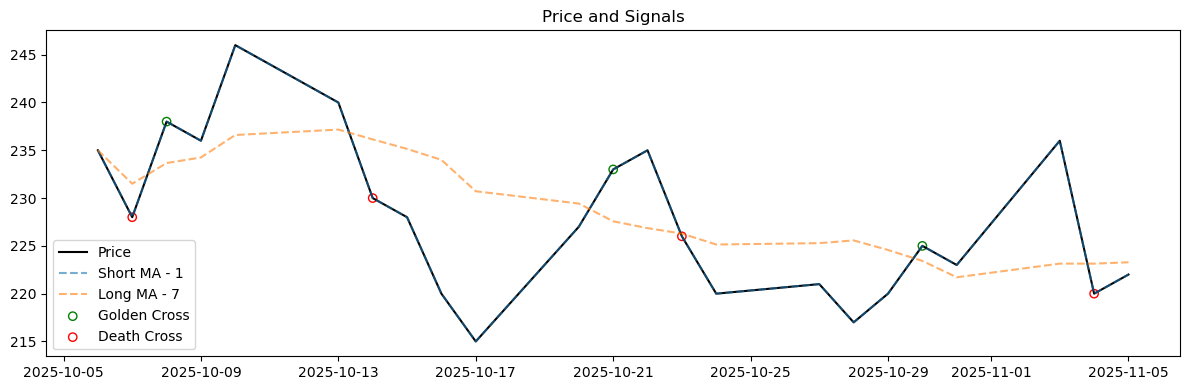

(                  count        mean      median        std  Win_Rate(%)  \
 Signal Trend                                                              
 Buy    Downtrend      5 -666.800494 -765.957447 417.273849     0.000000   
        Uptrend        2 -427.002255 -427.002255 124.477952     0.000000   
 Hold   Downtrend      1 -468.085106 -468.085106        NaN     0.000000   
 Sell   Downtrend      5 -119.138531  -90.497738 366.634723    40.000000   
        Uptrend        6 -305.403736 -369.450317 422.497609    16.666667   
 
                     Sharpe  Win/Loss_Ratio  Expected_Value  
 Signal Trend                                                
 Buy    Downtrend -1.597993        0.452136     -400.181074  
        Uptrend   -3.430344        0.452136     -400.181074  
 Hold   Downtrend       NaN        0.452136     -400.181074  
 Sell   Downtrend -0.324952        0.452136     -400.181074  
        Uptrend   -0.722853        0.452136     -400.181074  ,
            Signal      Trend  

In [333]:
##Worst combination  
metr_ma_crx_v1(data=df[["PPE.JO"]], start_date=less_params['Start'], end_date=less_params['End'], ma_upp=less_params['MA_upp'], 
               ma_lwr=less_params['MA_lwr'], lookahead=less_params['Lookahead'], plot=True)

In [334]:
#Analysis
results_df2 = results_df

# Clean the Score column
results_df2['Score'] = results_df2['Score'].astype(str).str.replace(',', '').astype(float)

# Descriptive statistics
print("Descriptive Statistics for 'Score':")
print(results_df2['Score'].describe())

# Group-wise average scores by Data
group_summary = results_df2.groupby(['Data'])['Score'].mean().reset_index()

print("\n Parameter Combinations by Data:")
print(group_summary.sort_values(by='Score', ascending=False))

# By Lookahead
group_summary = results_df2.groupby(['Lookahead'])['Score'].mean().reset_index()

print("\n Parameter Combinations by Lookahead:")
print(group_summary.sort_values(by='Score', ascending=False))

# By Moving Averages
group_summary = results_df2.groupby(['MA_lwr', 'MA_upp'])['Score'].mean().reset_index()

print("\nTop Parameter Combinations by MA:")
print(group_summary.sort_values(by='Score', ascending=False))


Descriptive Statistics for 'Score':
count    965.000000
mean      11.877301
std       75.329222
min     -400.181074
25%      -15.857410
50%        3.086926
75%       32.854288
max      364.885061
Name: Score, dtype: float64

 Parameter Combinations by Data:
       Data      Score
4    SSW.JO  57.702298
2    PPE.JO  15.029327
3       SPY  10.244995
1       EZA   8.523450
6      ^TYX   5.107823
0   BTC-USD   4.122720
5  USDZAR=X -17.638560

 Parameter Combinations by Lookahead:
   Lookahead     Score
1          2 18.322311
0          1 10.870177
2          4 10.610577
3          7  6.130861

Top Parameter Combinations by MA:
   MA_lwr  MA_upp     Score
6       7      10 31.661574
3       5       7 24.745359
4       5      10 24.295319
5       5      14 12.827152
7       7      14 12.782791
2       1      14  1.888873
1       1      10 -8.040860
0       1       7 -8.884002


## Conclusion




Write Analysis!

# Bollinger Bands

Bollinger Bands consist of three lines plotted on a price chart:
- Middle Band: A simple moving average (SMA), usually a 20-period.
- Upper Band: The SMA plus two standard deviations.
- Lower Band: The SMA minus two standard deviations.
  
These bands expand and contract based on market volatility; they widen during high volatility and narrow during low volatility. Used to identify overbought or oversold conditions in the market.

Interpreting Bollinger Bands Signals:
- Overbought Conditions: When the price touches or exceeds the upper band, indicates the asset is overbought, suggesting a sell signal.
- Oversold Conditions: When the price touches or falls below the lower band, indicates the asset is oversold, suggesting a buy signal.
- Volatility Breakouts: A squeeze (when the bands come close together) often precedes significant price movements, indicating potential breakout opportunities.

Trading Strategies with Bollinger Bands:
- Trend Following: Use bands to identify the direction of the trend. If the price consistently stays above the middle band, it indicates an uptrend, while staying below indicates a downtrend.
- Mean Reversion: Look for price reversals when the price touches the upper or lower bands, betting the price will revert to the mean (the middle band). 

In [337]:
def calculate_bollinger_bands(data, window, num_std):
    if len(data) < window: 
        raise ValueError("Not enough data points for the given window size.")
    
    sma = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()

    #Add Lower & Upper Bands
    upper_band = sma + (rolling_std * num_std)
    lower_band = sma - (rolling_std * num_std)
    
    #Create Dataframe
    bands = pd.DataFrame({
        'Price': data, #.squeeze(),
        'SMA': sma,
        'Upper Band': upper_band,
        'Lower Band': lower_band})

    #Position Signal
    bands['Signal'] = np.select([ (bands['Price'] >= bands['Upper Band']) ,
        (bands['Price'] <= bands['Lower Band'])], ['Sell', 'Buy'], default='None')

    #Position
    bands['Position'] = bands['Signal'].replace('None', pd.NA).ffill()
    bands['Position'] = bands['Position'].replace(pd.NA, 'None')

    #Trend Signal
    bands['Trend'] = np.select([ (bands['Price'] > bands['SMA']) ,
        (bands['Price'] < bands['SMA'])], ['Uptrend', 'Downtrend'], default='None')
    
    return bands

In [338]:
def metr_bb_v1(data, start_date, end_date, window, num_std, lookahead, plot=True):
    # Datetime index and proper slicing
    data = data.loc[start_date:end_date].sort_index()
    
    bands = calculate_bollinger_bands(data, window=window, num_std=num_std)
    
    # Performance testing
    results = []
    for i in range(len(bands) - lookahead):
        current_price = bands['Price'].iloc[i]
        future_price = bands['Price'].iloc[i + lookahead]

        signal = bands['Position'].iloc[i]
        trend = bands['Trend'].iloc[i]

        if signal == 'Buy':
            bps_chng = ((future_price - current_price) / current_price) * 10000
        elif signal == 'Sell':
            bps_chng = ((current_price - future_price) / current_price) * 10000
        else:
            bps_chng = ((future_price - current_price) / current_price) * 10000

        bps_sucs, bps_fail, bps_gnd, bps_lst = rez_id(bps_chng)
        
        results.append({
            'Date': bands.index[i],
            'Position': signal,
            'Trend': trend,
            'bps_change': bps_chng,
            '#Trades_Gain': bps_sucs,
            '#Trades_Lost': bps_fail,
            'bps_gained': bps_gnd,
            'bps_lost': bps_lst
        })

    results_df = pd.DataFrame(results)
    
    results_df = pd.DataFrame(results).set_index('Date')

    # Performance Summary
    summary = results_df.groupby(['Position', 'Trend'])['bps_change'].agg(['count', 'mean', 'median', 'std'])
    win_rate = results_df.groupby(['Position', 'Trend']).apply(lambda x: (x['bps_change'] > 0).mean() * 100).rename('Win_Rate(%)')
    
    summary = summary.join(win_rate)
    summary['Sharpe'] = summary['mean'] / summary['std']
    
    # Compute win/loss ratio and expected value
    gain_stats = results_df[results_df['bps_change'] > 0]['bps_change'].mean()
    loss_stats = abs(results_df[results_df['bps_change'] < 0]['bps_change'].mean())
    overall_wr = (results_df['bps_change'] > 0).mean() * 100

    summary['Win/Loss_Ratio'] = gain_stats / loss_stats if loss_stats != 0 else np.nan
    summary['Expected_Value'] = (overall_wr/100 * gain_stats) - ((1 - overall_wr/100) * loss_stats)
    
    
    if plot:
        fig, axes = plt.subplots(figsize=(12, 4))
        axes.plot(data.index, data, label='Close Price', color='black')
        axes.plot(data.index, bands['SMA'], label='SMA', color='orange')
        axes.plot(data.index, bands['Upper Band'], label='Upper Band', color='blue')
        axes.plot(data.index, bands['Lower Band'], label='Lower Band', color='purple')
        axes.fill_between(data.index, bands['Lower Band'], bands['Upper Band'], color='gray', alpha=0.1)

        #Trade Points
        buy_points = bands[bands['Signal'] == 'Buy'].index
        sell_points = bands[bands['Signal'] == 'Sell'].index

        axes.scatter(buy_points, data.loc[buy_points], color='green', marker='^', label='Buy Signal')
        axes.scatter(sell_points, data.loc[sell_points], color='red', marker='v', label='Sell Signal')
        
        axes.set_title('Bollinger Bands')
        axes.set_xlabel('Date')
        axes.set_ylabel('Price')
        axes.legend()
        plt.show()
        
    return bands, summary, results_df

2020-06-01 00:00:00
2025-11-05 00:00:00


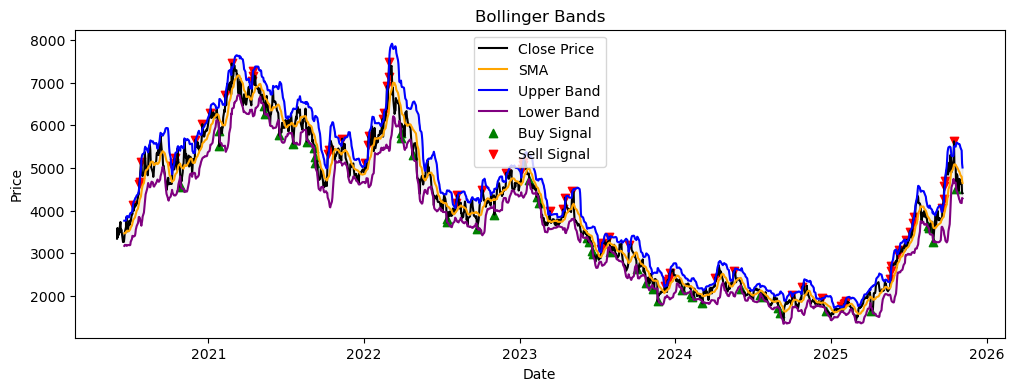

(                  Price          SMA   Upper Band   Lower Band Signal  \
 Date                                                                    
 2020-06-01 3,340.525635          NaN          NaN          NaN   None   
 2020-06-02 3,590.965332          NaN          NaN          NaN   None   
 2020-06-03 3,372.454102          NaN          NaN          NaN   None   
 2020-06-04 3,512.141846          NaN          NaN          NaN   None   
 2020-06-05 3,431.322510          NaN          NaN          NaN   None   
 ...                 ...          ...          ...          ...    ...   
 2025-10-30 4,682.000000 4,873.230769 5,528.866417 4,217.595122   None   
 2025-10-31 4,633.000000 4,835.384615 5,484.814385 4,185.954846   None   
 2025-11-03 4,641.000000 4,791.923077 5,408.675573 4,175.170581   None   
 2025-11-04 4,400.000000 4,697.769231 5,100.740821 4,294.797640   None   
 2025-11-05 4,406.000000 4,646.461538 5,010.360440 4,282.562637   None   
 
            Position      Trend  
 D

In [339]:
print(df.index[-1] - pd.DateOffset(years=5, months=5, days=4))
print(df.index[-1])
#print(df.index[-1] - pd.DateOffset(years=0, months=1, days=0))

metr_bb_v1(data=df["SSW.JO"], start_date=df.index[-1] - pd.DateOffset(years=5, months=5, days=4), end_date=df.index[-1], window=13, num_std=2, lookahead=1, plot=True)

In [340]:
# Start timer
start_time = time.time()

# Define dats
dats = [df["SSW.JO"], df["PPE.JO"], df_etf["SPY"], df_etf["^TYX"], df_etf["EZA"], df_wkd["USDZAR=X"], df_wkd1["BTC-USD"]]

# Define date ranges
starts = [
    df.index[-1] - pd.DateOffset(years=0, months=6)
    ,df.index[-1] - pd.DateOffset(years=0, months=3)
    ,df.index[-1] - pd.DateOffset(years=0, months=1)
    ,df.index[-1] - pd.DateOffset(years=0, months=0, days=14)
    ,df.index[-1] - pd.DateOffset(years=0, months=0, days=7)
]

ends = [
    df.index[-1]
]

# Other hyperparameters
lookaheads = [1, 2, 4, 7]
windows = [13, 20, 37]
num_stds = [2, 10, 14]

# Define parameter grid
param_grid = list(itertools.product(
    dats, starts, ends, lookaheads, windows, num_stds
))

results = []
best_score = float('-inf')
less_score = float('inf')
best_params = None
less_params = None

def evaluate_params(params):
    dat, start, end, lookahead, window, num_std = params

    if end <= start or len(pd.bdate_range(start, end))  < window: 
        return None

    try:
        f_dat, f_summ, f_rez = metr_bb_v1(data=dat, start_date=start, end_date=end, window=window, num_std=num_std, 
                                          lookahead=lookahead, plot=False)
        score = f_summ['Expected_Value'].mean()

        return {
            'Data': dat.name,
            'Start': start,
            'End': end,
            'Lookahead': lookahead,
            'Window': window,
            'Standard Dev': num_std,
            'Score': score
        }

    except Exception as e:
        print(f"Error for {dat.name}, {start}, {end}, {lookahead}, {window}, {num_std}: {e}")
        return None

# Run grid search with progress bar and parallel execution
with ThreadPoolExecutor() as executor:
    for result in tqdm(executor.map(evaluate_params, param_grid), total=len(param_grid)):
        if result:
            results.append(result)
            score = result['Score']
            if score > best_score:
                best_score = score
                best_params = result
            if score < less_score:
                less_score = score
                less_params = result

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Output best and worst results
if best_params:
    print("\nBest combination found:")
    print(best_params)
    print(f"Avg BPS Gained: {best_score:.2f}")

if less_params:
    print("\nWorst combination found:")
    print(less_params)
    print(f"Avg BPS Lost: {less_score:.2f}")

# Total runtime
end_time = time.time()
print(f"\nTotal Run Time: {(end_time - start_time)/60:.2f} minutes")

100%|██████████| 1260/1260 [00:19<00:00, 64.12it/s] 



Best combination found:
{'Data': 'SSW.JO', 'Start': Timestamp('2025-05-05 00:00:00'), 'End': Timestamp('2025-11-05 00:00:00'), 'Lookahead': 7, 'Window': 37, 'Standard Dev': 2, 'Score': 579.4209684855414}
Avg BPS Gained: 579.42

Worst combination found:
{'Data': 'SSW.JO', 'Start': Timestamp('2025-10-05 00:00:00'), 'End': Timestamp('2025-11-05 00:00:00'), 'Lookahead': 7, 'Window': 13, 'Standard Dev': 2, 'Score': -381.5711703112558}
Avg BPS Lost: -381.57

Total Run Time: 0.34 minutes


In [341]:
# Print top results
print(results_df.sort_values(by='Score', ascending=False).dropna())

       Data      Start        End  Lookahead  Window  Standard Dev       Score
33   SSW.JO 2025-05-05 2025-11-05          7      37             2  579.420968
165  PPE.JO 2025-08-05 2025-11-05          7      37             2  485.765995
34   SSW.JO 2025-05-05 2025-11-05          7      37            10  470.015597
28   SSW.JO 2025-05-05 2025-11-05          7      13            10  470.015597
29   SSW.JO 2025-05-05 2025-11-05          7      13            14  470.015597
..      ...        ...        ...        ...     ...           ...         ...
92   SSW.JO 2025-10-05 2025-11-05          7      13            14 -381.571170
93   SSW.JO 2025-10-05 2025-11-05          7      20             2 -381.571170
94   SSW.JO 2025-10-05 2025-11-05          7      20            10 -381.571170
95   SSW.JO 2025-10-05 2025-11-05          7      20            14 -381.571170
91   SSW.JO 2025-10-05 2025-11-05          7      13            10 -381.571170

[672 rows x 7 columns]


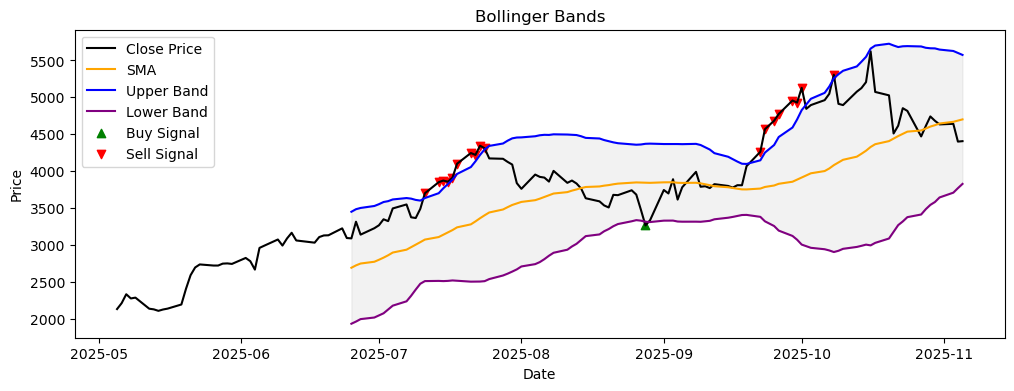

(                  Price          SMA   Upper Band   Lower Band Signal  \
 Date                                                                    
 2025-05-05 2,130.000000          NaN          NaN          NaN   None   
 2025-05-06 2,210.000000          NaN          NaN          NaN   None   
 2025-05-07 2,331.000000          NaN          NaN          NaN   None   
 2025-05-08 2,274.000000          NaN          NaN          NaN   None   
 2025-05-09 2,285.000000          NaN          NaN          NaN   None   
 ...                 ...          ...          ...          ...    ...   
 2025-10-30 4,682.000000 4,622.378378 5,663.547310 3,581.209446   None   
 2025-10-31 4,633.000000 4,645.216216 5,647.487097 3,642.945335   None   
 2025-11-03 4,641.000000 4,668.081081 5,628.331555 3,707.830607   None   
 2025-11-04 4,400.000000 4,685.108108 5,601.218216 3,768.998000   None   
 2025-11-05 4,406.000000 4,700.864865 5,575.114024 3,826.615706   None   
 
            Position      Trend  
 D

In [342]:
##Best combination

metr_bb_v1(data=df["SSW.JO"], start_date=best_params['Start'], end_date=best_params['End'],
                                  window=best_params['Window'], num_std=best_params['Standard Dev'], lookahead=best_params['Lookahead'], 
                                  plot=True)

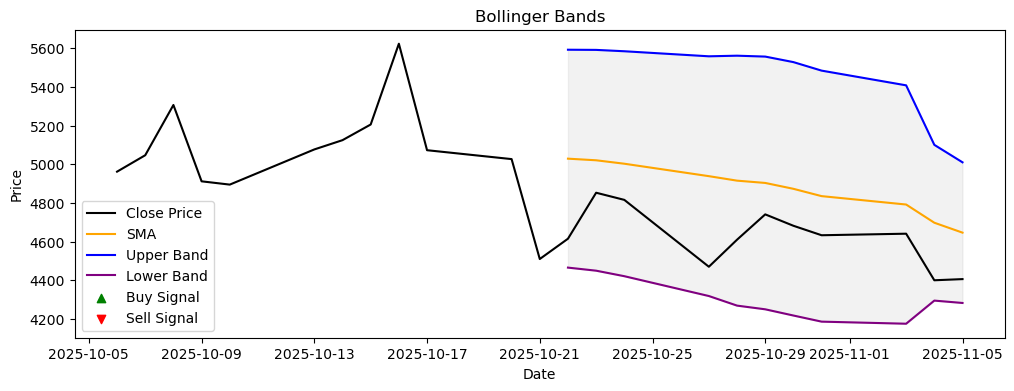

(                  Price          SMA   Upper Band   Lower Band Signal  \
 Date                                                                    
 2025-10-06 4,962.000000          NaN          NaN          NaN   None   
 2025-10-07 5,047.000000          NaN          NaN          NaN   None   
 2025-10-08 5,307.000000          NaN          NaN          NaN   None   
 2025-10-09 4,912.000000          NaN          NaN          NaN   None   
 2025-10-10 4,895.000000          NaN          NaN          NaN   None   
 2025-10-13 5,077.000000          NaN          NaN          NaN   None   
 2025-10-14 5,125.000000          NaN          NaN          NaN   None   
 2025-10-15 5,206.000000          NaN          NaN          NaN   None   
 2025-10-16 5,624.000000          NaN          NaN          NaN   None   
 2025-10-17 5,073.000000          NaN          NaN          NaN   None   
 2025-10-20 5,027.000000          NaN          NaN          NaN   None   
 2025-10-21 4,510.000000          NaN 

In [343]:
##Worst combination  

metr_bb_v1(data=df["SSW.JO"], start_date=less_params['Start'], end_date=less_params['End'],
                                  window=less_params['Window'], num_std=less_params['Standard Dev'], lookahead=less_params['Lookahead'], 
                                  plot=True)

In [344]:
#Analysis
results_df3 = results_df

# Clean the Score column
results_df3['Score'] = results_df3['Score'].astype(str).str.replace(',', '').astype(float)

# Descriptive statistics
print("Descriptive Statistics for 'Score':")
print(results_df3['Score'].describe())

# Group-wise average scores by Data
group_summary = results_df3.groupby(['Data'])['Score'].mean().reset_index()

print("\n Parameter Combinations by Data:")
print(group_summary.sort_values(by='Score', ascending=False))

# By Lookahead
group_summary = results_df3.groupby(['Lookahead'])['Score'].mean().reset_index()

print("\n Parameter Combinations by Lookahead:")
print(group_summary.sort_values(by='Score', ascending=False))

# By Window
group_summary = results_df3.groupby(['Window'])['Score'].mean().reset_index()

print("\nTop Parameter Combinations by Window:")
print(group_summary.sort_values(by='Score', ascending=False))

# By Standard Dev
group_summary = results_df3.groupby(['Standard Dev'])['Score'].mean().reset_index()

print("\nTop Parameter Combinations by Standard Dev:")
print(group_summary.sort_values(by='Score', ascending=False))

Descriptive Statistics for 'Score':
count    672.000000
mean      17.940756
std      116.201045
min     -381.571170
25%      -20.147869
50%        6.553680
75%       47.238825
max      579.420968
Name: Score, dtype: float64

 Parameter Combinations by Data:
       Data      Score
4    SSW.JO  73.686003
3       SPY  40.798399
2    PPE.JO  29.216885
1       EZA  19.552024
5  USDZAR=X  -6.398151
6      ^TYX -10.525894
0   BTC-USD -20.743972

 Parameter Combinations by Lookahead:
   Lookahead     Score
3          7 42.832399
2          4 18.602402
1          2  6.945986
0          1  3.382237

Top Parameter Combinations by Window:
   Window     Score
2      37 56.610816
1      20  7.934088
0      13  2.167384

Top Parameter Combinations by Standard Dev:
   Standard Dev     Score
1            10 25.003616
2            14 25.003616
0             2  3.815037


## Conclusion

Here

# Moving Average Convergence/Divergence Oscillator (MACD)

MACD uses two Moving Averages of varying lengths (i.e. lagging indicators) to identify trend direction and duration. Then takes the difference in values between those two Moving Averages (MACD Line) and an EMA of those Moving Averages (Signal Line) and plots that difference between the two lines as a histogram which oscillates above and below a center Zero Line. 
The histogram is used as a good indication of a security's momentum.

Interpretation: When MACD is positive and histogram value is increasing, then upside momentum is increasing. When MACD is negative and histogram value is decreasing, then downside momentum is increasing.

Good for identifying 3 types of signals:

    i) Signal Line Crossovers - Bullish Signal Line Crossovers occur when MACD Line crosses above Signal Line.
                              - Bearish Signal Line Crossovers occur when MACD Line crosses below Signal Line.

    ii) Zero Line Crossovers - Bullish Zero Line Crossovers occur when MACD Line goes from negative to positive.
                             - Bearish Zero Line Crossovers occur when MACD Line goes from positive to negative.

    iii) Divergence - Bullish Divergence occurs when price records a lower low, but MACD records a higher low.
                    - Bearish Divergence occurs when price records a higher high while MACD records a lower high.

In [5]:
# Function to calculate MACD, Signal Line, Histogram, and test signal effectiveness
def calculate_macd(prices, short_window=12, long_window=26, signal_window=9, plot=True):
    # --- MACD calculation ---
    short_ema = prices.ewm(span=short_window, adjust=False).mean()
    long_ema = prices.ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    hist = macd_line - signal_line

    macd_df = pd.DataFrame({
        'Prices': prices,
        'MACD': macd_line,
        'Signal': signal_line,
        'Histogram': hist
    })

    # --- Detect Signal Line Crossovers ---
    macd_df['Signal_Crossover'] = np.where(
        (macd_df['MACD'].shift(1) < macd_df['Signal'].shift(1)) & (macd_df['MACD'] > macd_df['Signal']),
        'Bullish',
        np.where(
            (macd_df['MACD'].shift(1) > macd_df['Signal'].shift(1)) & (macd_df['MACD'] < macd_df['Signal']),
            'Bearish',
            None
        )
    )

    # --- Detect Zero Line Crossovers ---
    macd_df['Zero_Crossover'] = np.where(
        (macd_df['MACD'].shift(1) < 0) & (macd_df['MACD'] > 0),
        'Bullish',
        np.where(
            (macd_df['MACD'].shift(1) > 0) & (macd_df['MACD'] < 0),
            'Bearish',
            None
        )
    )

    # --- Detect Divergences ---
    macd_df['Price_Change'] = macd_df['Prices'].diff()
    macd_df['MACD_Change'] = macd_df['MACD'].diff()
    macd_df['Divergence'] = np.where(
        (macd_df['Price_Change'] < 0) & (macd_df['MACD_Change'] > 0),
        'Bullish',
        np.where(
            (macd_df['Price_Change'] > 0) & (macd_df['MACD_Change'] < 0),
            'Bearish',
            None
        )
    )

    # --- Simple Stress Test of Effectiveness ---
    results = []
    for i in range(len(macd_df) - test_window):
        row = macd_df.iloc[i]
        future_price = macd_df['Prices'].iloc[i + test_window]
        change = (future_price - row['Prices']) / row['Prices']

        for signal_type, column in [('Signal', 'Signal_Crossover'), ('Zero', 'Zero_Crossover'), ('Div', 'Divergence')]:
            signal = row[column]
            if signal == 'Bullish':
                results.append({'Type': signal_type, 'Signal': 'Bullish', 'Return': change})
            elif signal == 'Bearish':
                results.append({'Type': signal_type, 'Signal': 'Bearish', 'Return': -change})

    if results:
        df_test = pd.DataFrame(results)
        performance = df_test.groupby(['Type', 'Signal']).agg(
            count=('Return', 'count'),
            mean_return=('Return', 'mean'),
            win_rate=('Return', lambda x: (x > 0).mean())
        ).reset_index()
        print("\n📊 MACD Signal Effectiveness ({}-day horizon):".format(test_window))
        print(performance)
    else:
        print("⚠️ No MACD signals detected during the test period.")

    # --- Plot ---
    if plot:
        plt.figure(figsize=(14, 8))

        # Price Plot
        plt.subplot(2, 1, 1)
        plt.plot(macd_df.index, macd_df['Prices'], label='Price', color='black')
        plt.scatter(macd_df.index[macd_df['Signal_Crossover'] == 'Bullish'],
                    macd_df['Prices'][macd_df['Signal_Crossover'] == 'Bullish'], marker='^', color='green', label='Bullish Signal')
        plt.scatter(macd_df.index[macd_df['Signal_Crossover'] == 'Bearish'],
                    macd_df['Prices'][macd_df['Signal_Crossover'] == 'Bearish'], marker='v', color='red', label='Bearish Signal')
        plt.title('Price and MACD for Stress-Tested Signals')
        plt.legend()
        plt.ylabel('Price')

        # MACD Plot
        plt.subplot(2, 1, 2)
        plt.plot(macd_df.index, macd_df['MACD'], label='MACD', color='blue')
        plt.plot(macd_df.index, macd_df['Signal'], label='Signal', color='orange')
        plt.bar(macd_df.index, macd_df['Histogram'], color='gray', label='Histogram')
        plt.legend()
        plt.xlabel('Date')
        plt.ylabel('MACD')

        plt.tight_layout()
        plt.show()

    return macd_df

More ChatGPT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_macd(prices, short_window=12, long_window=26, signal_window=9):
    short_ema = prices.ewm(span=short_window, adjust=False).mean()
    long_ema = prices.ewm(span=long_window, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    hist = macd_line - signal_line

    return pd.DataFrame({
        'Prices': prices,
        'MACD': macd_line,
        'Signal': signal_line,
        'Histogram': hist
    })


def generate_macd_signals(macd_df):
    macd_df['Signal_Crossover'] = np.where(
        (macd_df['MACD'].shift(1) < macd_df['Signal'].shift(1)) & (macd_df['MACD'] > macd_df['Signal']),
        'Bullish',
        np.where(
            (macd_df['MACD'].shift(1) > macd_df['Signal'].shift(1)) & (macd_df['MACD'] < macd_df['Signal']),
            'Bearish',
            None
        )
    )

    macd_df['Zero_Crossover'] = np.where(
        (macd_df['MACD'].shift(1) < 0) & (macd_df['MACD'] > 0),
        'Bullish',
        np.where(
            (macd_df['MACD'].shift(1) > 0) & (macd_df['MACD'] < 0),
            'Bearish',
            None
        )
    )

    macd_df['Price_Change'] = macd_df['Prices'].diff()
    macd_df['MACD_Change'] = macd_df['MACD'].diff()
    macd_df['Divergence'] = np.where(
        (macd_df['Price_Change'] < 0) & (macd_df['MACD_Change'] > 0),
        'Bullish',
        np.where(
            (macd_df['Price_Change'] > 0) & (macd_df['MACD_Change'] < 0),
            'Bearish',
            None
        )
    )

    return macd_df


def backtest_macd_strategy(macd_df, initial_capital=10000, signal_type='Signal_Crossover', plot=True):
    df = macd_df.copy()
    df['Position'] = 0

    # Buy and sell based on the chosen signal type
    df.loc[df[signal_type] == 'Bullish', 'Position'] = 1
    df.loc[df[signal_type] == 'Bearish', 'Position'] = -1
    df['Position'] = df['Position'].replace(to_replace=0, method='ffill').fillna(0)

    # Daily returns
    df['Return'] = df['Prices'].pct_change()
    df['Strategy_Return'] = df['Return'] * df['Position']

    # Equity curve
    df['Equity'] = (1 + df['Strategy_Return']).cumprod() * initial_capital

    # Performance metrics
    total_return = (df['Equity'].iloc[-1] / initial_capital - 1) * 100
    win_rate = (df['Strategy_Return'] > 0).mean() * 100
    sharpe = np.sqrt(252) * df['Strategy_Return'].mean() / df['Strategy_Return'].std()
    rolling_max = df['Equity'].cummax()
    drawdown = (df['Equity'] - rolling_max) / rolling_max
    max_drawdown = drawdown.min() * 100

    print("\n📈 MACD Backtest Results")
    print(f"Signal Type: {signal_type}")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2f}%")

    # --- Plot ---
    if plot:
        plt.figure(figsize=(14, 8))

        # 1️⃣ Price & Signals
        plt.subplot(2, 1, 1)
        plt.plot(df.index, df['Prices'], label='Price', color='black')
        plt.scatter(df.index[df[signal_type] == 'Bullish'], df['Prices'][df[signal_type] == 'Bullish'],
                    marker='^', color='green', label='Buy Signal', alpha=0.8)
        plt.scatter(df.index[df[signal_type] == 'Bearish'], df['Prices'][df[signal_type] == 'Bearish'],
                    marker='v', color='red', label='Sell Signal', alpha=0.8)
        plt.title(f'MACD Backtest ({signal_type})')
        plt.legend()
        plt.ylabel('Price')

        # 2️⃣ Equity Curve
        plt.subplot(2, 1, 2)
        plt.plot(df.index, df['Equity'], label='Equity Curve', color='blue')
        plt.fill_between(df.index, rolling_max, df['Equity'], color='lightcoral', alpha=0.3, label='Drawdown')
        plt.title('Equity Curve & Drawdown')
        plt.legend()
        plt.ylabel('Portfolio Value ($)')
        plt.xlabel('Date')

        plt.tight_layout()
        plt.show()

    return df


# Example usage:
if __name__ == "__main__":
    import yfinance as yf

    # Download daily price data
    ticker = "AAPL"
    data = yf.download(ticker, start="2022-01-01", end="2025-01-01")

    # Compute MACD
    macd_df = calculate_macd(data['Close'])
    macd_df = generate_macd_signals(macd_df)

    # Backtest on signal line crossovers #'Zero_Crossover', 'Divergence'
    results = backtest_macd_strategy(macd_df, signal_type='Signal_Crossover', plot=True)

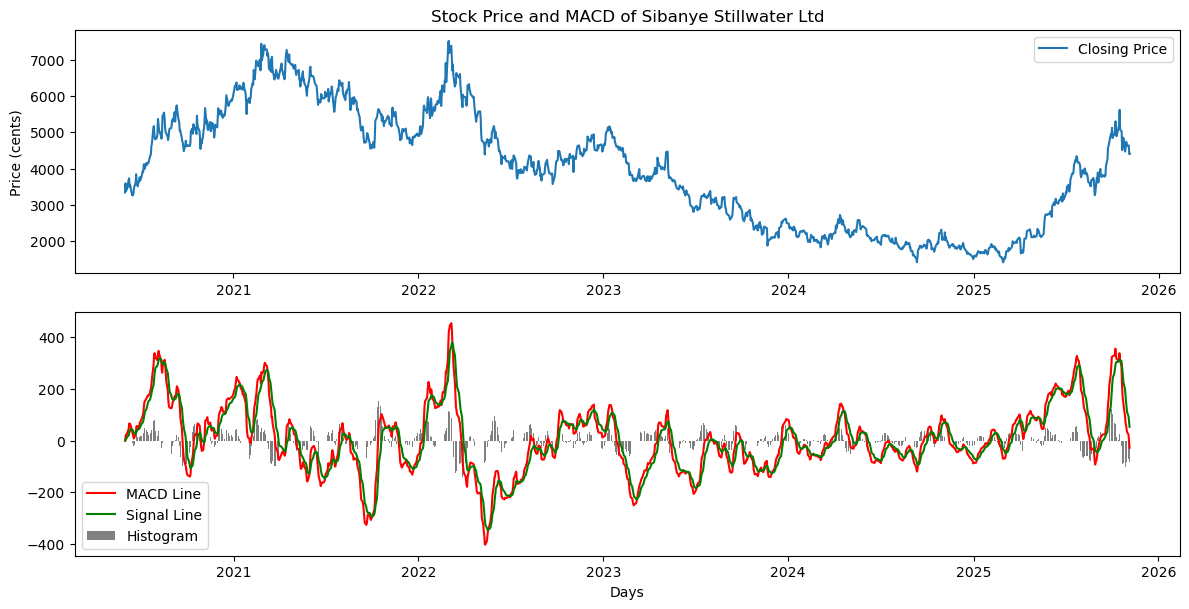

,Prices,MACD,Signal,Histogram
Date,,,,
2020-06-01,"3,340.525635",0.000000,0.000000,0.000000
2020-06-02,"3,590.965332",19.978096,3.995619,15.982476
2020-06-03,"3,372.454346",17.971703,6.790836,11.180867
2020-06-04,"3,512.141602",27.338080,10.900285,16.437796
2020-06-05,"3,431.322266",27.917739,14.303776,13.613963
...,...,...,...,...
2025-10-30,"4,682.000000",48.489604,130.676615,-82.187012
2025-10-31,"4,633.000000",33.881229,111.317538,-77.436309
2025-11-03,"4,641.000000",22.687987,93.591628,-70.903641


In [6]:
calculate_macd(prices=df["SSW.JO"], short_window=12, long_window=26, signal_window=9, plot=True)

# Parabolic SAR (Stop and Reverse)

The Parabolic SAR (Stop and Reverse) is a technical analysis indicator used to identify potential trend reversals and set trailing stop-loss orders in trading. The position of the dots indicates the direction of the trend:

- Dots below the price suggest a bullish trend, indicating potential buying opportunities.
    
- Dots above the price indicate a bearish trend, suggesting potential selling or shorting opportunities. 

In [ ]:
def parabolic_sar(df, step=0.02, max_step=0.2):
    ##Parabolic SAR for given OHLC data.
    
    # Validate input
    if not {'High', 'Low'}.issubset(df.columns):
        raise ValueError("DataFrame must contain 'High' and 'Low' columns.")
    if step <= 0 or max_step <= 0:
        raise ValueError("Step and max_step must be positive.")
    if step > max_step:
        raise ValueError("Step cannot be greater than max_step.")

    # Initialize variables
    sar = df['Low'][0]  # Start SAR at first low
    ep = df['High'][0]  # Extreme Point
    af = step           # Acceleration Factor
    long_position = True
    sar_values = [sar]

    for i in range(1, len(df)):
        prev_sar = sar
        prev_ep = ep
        prev_af = af
        prev_long = long_position

        # Calculate SAR
        sar = prev_sar + prev_af * (prev_ep - prev_sar)

        if prev_long:
            # Ensure SAR does not exceed last two lows
            sar = min(sar, df['Low'][i-1], df['Low'][i])
            if df['High'][i] > prev_ep:
                ep = df['High'][i]
                af = min(prev_af + step, max_step)
            else:
                ep = prev_ep
                af = prev_af
            if df['Low'][i] < sar:
                long_position = False
                sar = prev_ep
                ep = df['Low'][i]
                af = step
        else:
            # Ensure SAR does not fall below last two highs
            sar = max(sar, df['High'][i-1], df['High'][i])
            if df['Low'][i] < prev_ep:
                ep = df['Low'][i]
                af = min(prev_af + step, max_step)
            else:
                ep = prev_ep
                af = prev_af
            if df['High'][i] > sar:
                long_position = True
                sar = prev_ep
                ep = df['High'][i]
                af = step

        sar_values.append(sar)

    return pd.Series(sar_values, index=df.index, name='Parabolic_SAR')



# Sample OHLC data
data = {
    'High': [10, 10.5, 10.8, 10.6, 11, 11.2, 11.5],
    'Low':  [9.5, 10.1, 10.3, 10.2, 10.6, 10.9, 11.1]
}
df = pd.DataFrame(data)
df['Parabolic_SAR'] = parabolic_sar(df)

In [ ]:
#Create OHLC dataframe
low = df_l["PPE.JO"].rename("Low")
high = df_h["PPE.JO"].rename("High")

df_ohlc = pd.concat([low, high], axis=1)
print(df_ohlc.head())

ChatGPT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Parabolic SAR calculation (your version with minor improvements) ---
def parabolic_sar(df, step=0.02, max_step=0.2):
    if not {'High', 'Low'}.issubset(df.columns):
        raise ValueError("DataFrame must contain 'High' and 'Low' columns.")
    if step <= 0 or max_step <= 0:
        raise ValueError("Step and max_step must be positive.")
    if step > max_step:
        raise ValueError("Step cannot be greater than max_step.")

    sar = df['Low'][0]
    ep = df['High'][0]
    af = step
    long_position = True
    sar_values = [sar]

    for i in range(1, len(df)):
        prev_sar = sar
        prev_ep = ep
        prev_af = af
        prev_long = long_position

        sar = prev_sar + prev_af * (prev_ep - prev_sar)

        if prev_long:
            sar = min(sar, df['Low'][i-1], df['Low'][i])
            if df['High'][i] > prev_ep:
                ep = df['High'][i]
                af = min(prev_af + step, max_step)
            else:
                ep = prev_ep
                af = prev_af
            if df['Low'][i] < sar:
                long_position = False
                sar = prev_ep
                ep = df['Low'][i]
                af = step
        else:
            sar = max(sar, df['High'][i-1], df['High'][i])
            if df['Low'][i] < prev_ep:
                ep = df['Low'][i]
                af = min(prev_af + step, max_step)
            else:
                ep = prev_ep
                af = prev_af
            if df['High'][i] > sar:
                long_position = True
                sar = prev_ep
                ep = df['High'][i]
                af = step

        sar_values.append(sar)

    return pd.Series(sar_values, index=df.index, name='Parabolic_SAR')


# --- Signal generation and backtest ---
def backtest_parabolic_sar(df, step=0.02, max_step=0.2, initial_capital=10000, plot=True):
    df = df.copy()
    df['SAR'] = parabolic_sar(df, step=step, max_step=max_step)

    # Define signals: SAR below price = bullish, above = bearish
    df['Signal'] = np.where(df['SAR'] < df['Close'], 'Bullish',
                            np.where(df['SAR'] > df['Close'], 'Bearish', None))

    # Convert to position (1 = long, -1 = short)
    df['Position'] = np.where(df['Signal'] == 'Bullish', 1,
                              np.where(df['Signal'] == 'Bearish', -1, np.nan))
    df['Position'] = df['Position'].ffill().fillna(0)

    # Compute returns
    df['Return'] = df['Close'].pct_change()
    df['Strategy_Return'] = df['Return'] * df['Position']

    # Equity curve
    df['Equity'] = (1 + df['Strategy_Return']).cumprod() * initial_capital

    # --- Performance metrics ---
    total_return = (df['Equity'].iloc[-1] / initial_capital - 1) * 100
    win_rate = (df['Strategy_Return'] > 0).mean() * 100
    sharpe = np.sqrt(252) * df['Strategy_Return'].mean() / df['Strategy_Return'].std()
    rolling_max = df['Equity'].cummax()
    drawdown = (df['Equity'] - rolling_max) / rolling_max
    max_drawdown = drawdown.min() * 100

    print("\n📈 Parabolic SAR Backtest Results")
    print(f"Total Return: {total_return:.2f}%")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Sharpe Ratio: {sharpe:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2f}%")

    # --- Plot ---
    if plot:
        plt.figure(figsize=(14, 8))

        # 1️⃣ Price chart + SAR dots
        plt.subplot(2, 1, 1)
        plt.plot(df.index, df['Close'], label='Close Price', color='black')
        plt.scatter(df.index[df['SAR'] < df['Close']], df['SAR'][df['SAR'] < df['Close']],
                    color='green', label='SAR (Bullish)', s=20)
        plt.scatter(df.index[df['SAR'] > df['Close']], df['SAR'][df['SAR'] > df['Close']],
                    color='red', label='SAR (Bearish)', s=20)
        plt.title('Parabolic SAR Backtest')
        plt.legend()
        plt.ylabel('Price')

        # 2️⃣ Equity curve
        plt.subplot(2, 1, 2)
        plt.plot(df.index, df['Equity'], color='blue', label='Equity Curve')
        plt.fill_between(df.index, rolling_max, df['Equity'], color='lightcoral', alpha=0.3, label='Drawdown')
        plt.title('Portfolio Performance')
        plt.ylabel('Portfolio Value ($)')
        plt.xlabel('Date')
        plt.legend()

        plt.tight_layout()
        plt.show()

    return df


# --- Example usage ---
if __name__ == "__main__":
    import yfinance as yf

    ticker = "AAPL"
    data = yf.download(ticker, start="2022-01-01", end="2025-01-01")

    results = backtest_parabolic_sar(data, step=0.02, max_step=0.2, plot=True)
